# Ridge Regression: Auto MPG vs Weight

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Reference: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

df = pd.read_csv("auto_mpg.csv")
df.drop(df.columns[8], axis=1, inplace=True)    # Discard the discrete-valued features
df.dropna(axis=0, inplace=True)                 # Discard rows with missing values
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [3]:
# For X, take 'weight' only
# For y, take 'mpg'

X = df.iloc[:,4].to_numpy().reshape(-1,1)
y = df.iloc[:,0].to_numpy().reshape(-1,1)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

scalerY = StandardScaler()
y_train_scaled = scalerY.fit_transform(y_train)
y_test_scaled = scalerY.transform(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(392, 1)
(392, 1)
(274, 1)
(274, 1)
(118, 1)
(118, 1)


## Polynomial regression (4th degree) with no regularization yet

In [4]:
def basisfunc(x):
    f1 = np.ones(x.shape)
    f2 = x
    f3 = x**2
    f4 = x**3
    f5 = x**4
    return np.hstack((f1,f2,f3,f4,f5))

X_train_design = basisfunc(X_train_scaled)
X_test_design = basisfunc(X_test_scaled)
print(X_train_design)

W = np.linalg.inv(X_train_design.T @ X_train_design) @ X_train_design.T @ y_train_scaled
print("Polynomial model:\n mpg = ")
for i in range(len(W)):
    print(f"\t{W[i][0]}*x^{i}", end="")
    if i < len(W)-1:
        print(" + ")

[[ 1.00000000e+00 -3.26089868e-01  1.06334602e-01 -3.46746363e-02
   1.13070475e-02]
 [ 1.00000000e+00  1.08018215e+00  1.16679347e+00  1.26034947e+00
   1.36140699e+00]
 [ 1.00000000e+00 -8.23675584e-01  6.78441468e-01 -5.58815673e-01
   4.60282826e-01]
 ...
 [ 1.00000000e+00 -9.91906946e-01  9.83879389e-01 -9.75916799e-01
   9.68018651e-01]
 [ 1.00000000e+00  1.70311121e-01  2.90058779e-02  4.94002357e-03
   8.41340952e-04]
 [ 1.00000000e+00 -1.33217031e-02  1.77467773e-04 -2.36417299e-06
   3.14948106e-08]]
Polynomial model:
 mpg = 
	-0.18946586363489187*x^0 + 
	-0.9608982388111309*x^1 + 
	0.2172349010006171*x^2 + 
	0.03055662504516691*x^3 + 
	-0.0195824396422285*x^4

### Evaluate the model on training and test data

  Training MSE:	0.26755546302411926
  Test MSE:	0.3348808334121188
  Training R2:	0.7324445369758807
  Test R2:	0.6723693318496173


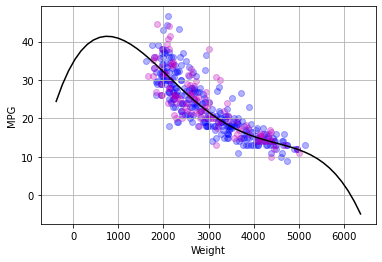

In [5]:
y_train_pred = X_train_design @ W
y_test_pred = X_test_design @ W

y_train_MSE = np.sum((y_train_pred - y_train_scaled) ** 2)
y_train_R2 = 1 - y_train_MSE/np.sum((y_train_scaled - np.mean(y_train_scaled)) ** 2)
y_train_MSE /= len(y_train_pred)

y_test_MSE = np.sum((y_test_pred - y_test_scaled) ** 2)
y_test_R2 = 1 - y_test_MSE/np.sum((y_test_scaled - np.mean(y_test_scaled)) ** 2)
y_test_MSE /= len(y_test_pred)

print(f"  Training MSE:\t{y_train_MSE}")
print(f"  Test MSE:\t{y_test_MSE}")
print(f"  Training R2:\t{y_train_R2}")
print(f"  Test R2:\t{y_test_R2}")

x_fine = np.linspace(-4,4).reshape(-1,1)
y_fine = scalerY.inverse_transform(basisfunc(x_fine) @ W)
x_fine = scalerX.inverse_transform(x_fine)

plt.scatter(X_train,y_train,c='b',alpha=0.3)
plt.scatter(X_test,y_test,c='m',alpha=0.3)
plt.plot(x_fine,y_fine,c='k')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid()
plt.show()

## Polynomial regression (4th degree) with Ridge regularization

In [6]:
reg = 5
W_reg = np.linalg.inv(X_train_design.T @ X_train_design +  \
                      reg*np.eye(X_train_design.shape[1])) \
                      @ X_train_design.T @ y_train_scaled
print("Polynomial model:\n mpg = ")
for i in range(len(W)):
    print(f"\t{W_reg[i][0]}*x^{i}", end="")
    if i < len(W_reg)-1:
        print(" + ")

Polynomial model:
 mpg = 
	-0.16130136020500355*x^0 + 
	-0.8435421737904093*x^1 + 
	0.15758477981804284*x^2 + 
	-0.039868584476024135*x^3 + 
	0.0119681266137085*x^4

### Evaluate the model on training and test data

  Training MSE:	0.26955824330758205
  Test MSE:	0.3342218276898427
  Training R2:	0.730441756692418
  Test R2:	0.6730140701074159


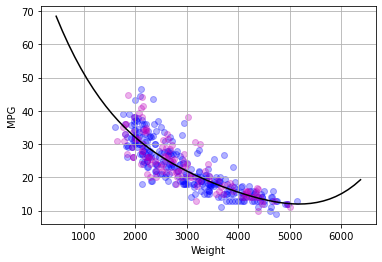

In [7]:
y_train_pred = X_train_design @ W_reg
y_test_pred = X_test_design @ W_reg

y_train_MSE = np.sum((y_train_pred - y_train_scaled) ** 2)
y_train_R2 = 1 - y_train_MSE/np.sum((y_train_scaled - np.mean(y_train_scaled)) ** 2)
y_train_MSE /= len(y_train_pred)

y_test_MSE = np.sum((y_test_pred - y_test_scaled) ** 2)
y_test_R2 = 1 - y_test_MSE/np.sum((y_test_scaled - np.mean(y_test_scaled)) ** 2)
y_test_MSE /= len(y_test_pred)

print(f"  Training MSE:\t{y_train_MSE}")
print(f"  Test MSE:\t{y_test_MSE}")
print(f"  Training R2:\t{y_train_R2}")
print(f"  Test R2:\t{y_test_R2}")

x_fine = np.linspace(-3,4).reshape(-1,1)
y_fine = scalerY.inverse_transform(basisfunc(x_fine) @ W_reg)
x_fine = scalerX.inverse_transform(x_fine)

plt.scatter(X_train,y_train,c='b',alpha=0.3)
plt.scatter(X_test,y_test,c='m',alpha=0.3)
plt.plot(x_fine,y_fine,c='k')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid()
plt.show()

## Non-hard-coded version of the above Ridge regression

Comparison of weights and biases:
Hard-coded: 
[[-0.16130136]
 [-0.84354217]
 [ 0.15758478]
 [-0.03986858]
 [ 0.01196813]]
Bulit-in:
[-0.16927086]
[[ 0.        ]
 [-0.84507998]
 [ 0.16554375]
 [-0.0391683 ]
 [ 0.01046457]]


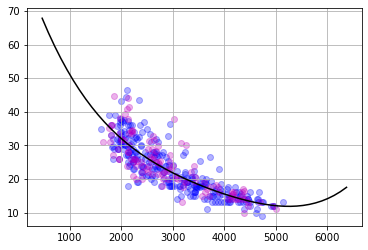

In [8]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(4)
X_train_design = pf.fit_transform(X_train_scaled)
X_test_design = pf.transform(X_test_scaled)

mdl = Ridge(alpha=reg).fit(X_train_design,y_train_scaled)
print("Comparison of weights and biases:")
print("Hard-coded: ")
print(W_reg)
print("Bulit-in:")
print(mdl.intercept_)
print(mdl.coef_.reshape(-1,1))
y_train_pred = mdl.predict(X_train_design)
y_test_pred = mdl.predict(X_test_design)
x_fine = np.linspace(-3,4).reshape(-1,1)
y_fine = mdl.predict(pf.transform(x_fine))
x_fine = scalerX.inverse_transform(x_fine)
y_fine = scalerY.inverse_transform(y_fine)

plt.scatter(X_train,y_train,c='b',alpha=0.3)
plt.scatter(X_test,y_test,c='m',alpha=0.3)
plt.plot(x_fine,y_fine,c='k')
plt.grid()
plt.show()